In [1]:
from google.colab import drive # Import a library named google.colab
drive.mount('/content/drive', force_remount=True) # mount the content to the directory `/content/drive`


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Spark/Pyspark-With-Python

/content/drive/MyDrive/Spark/Pyspark-With-Python


In [3]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 35 kB/s 
     |████████████████████████████████| 198 kB 58.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=539158c77da6b0ad9c4a27f9c72e205f7dea8510591d3e4193eb7834d3f255dc
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


### Pyspark Handling Missing Values
- Dropping Columns
- Dropping Rows
- Various Parameter In Dropping functionalities
- Handling Missing values by Mean, MEdian And Mode

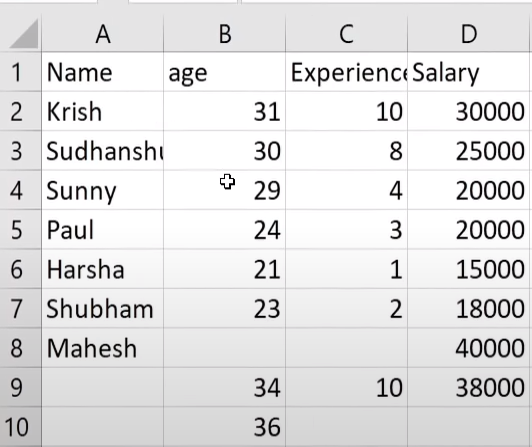

In [39]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Practice').getOrCreate()

In [40]:
df_pyspark=spark.read.csv('test2.csv',header=True,inferSchema=True)

In [41]:
df_pyspark.printSchema()

root
 |-- Name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- Experience: integer (nullable = true)
 |-- Salary: integer (nullable = true)



In [42]:
df_pyspark.show()

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|null|      null| 40000|
|     null|  34|        10| 38000|
|     null|  36|      null|  null|
+---------+----+----------+------+



In [43]:
##drop the columns
df_pyspark.drop('Name').show()

+----+----------+------+
| age|Experience|Salary|
+----+----------+------+
|  31|        10| 30000|
|  30|         8| 25000|
|  29|         4| 20000|
|  24|         3| 20000|
|  21|         1| 15000|
|  23|         2| 18000|
|null|      null| 40000|
|  34|        10| 38000|
|  36|      null|  null|
+----+----------+------+



In [44]:
df_pyspark.show()

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|null|      null| 40000|
|     null|  34|        10| 38000|
|     null|  36|      null|  null|
+---------+----+----------+------+



In [45]:
df_pyspark.na.drop().show() # drop all null values

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+



In [46]:
### any==how
# how=any means if a null in row then drop
# how=all means if all nulls in row then drop
df_pyspark.na.drop(how="any").show()
df_pyspark.na.drop(how="all").show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
+---------+---+----------+------+

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|null|      null| 40000|
|     null|  34|        10| 38000|
|     null|  36|      null|  null|
+---------+----+----------+------+



In [47]:
##threshold 
df_pyspark.na.drop(how="any",thresh=2).show()
#threshold means that at least two index value in the row, then keep

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|null|      null| 40000|
|     null|  34|        10| 38000|
+---------+----+----------+------+



In [48]:
##Subset
df_pyspark.na.drop(how="any",subset=['Age']).show()
# select specific columns 

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
|     null| 34|        10| 38000|
|     null| 36|      null|  null|
+---------+---+----------+------+



In [49]:
### Filling the Missing Value
df_pyspark.na.fill('Missing Values').show()

+--------------+----+----------+------+
|          Name| age|Experience|Salary|
+--------------+----+----------+------+
|         Krish|  31|        10| 30000|
|     Sudhanshu|  30|         8| 25000|
|         Sunny|  29|         4| 20000|
|          Paul|  24|         3| 20000|
|        Harsha|  21|         1| 15000|
|       Shubham|  23|         2| 18000|
|        Mahesh|null|      null| 40000|
|Missing Values|  34|        10| 38000|
|Missing Values|  36|      null|  null|
+--------------+----+----------+------+



In [54]:
df_pyspark.na.fill(-10000,'Experience').show()

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|null|    -10000| 40000|
|     null|  34|        10| 38000|
|     null|  36|    -10000|  null|
+---------+----+----------+------+



In [55]:
df_pyspark.na.fill(-10000,['Experience','age']).show()

+---------+------+----------+------+
|     Name|   age|Experience|Salary|
+---------+------+----------+------+
|    Krish|    31|        10| 30000|
|Sudhanshu|    30|         8| 25000|
|    Sunny|    29|         4| 20000|
|     Paul|    24|         3| 20000|
|   Harsha|    21|         1| 15000|
|  Shubham|    23|         2| 18000|
|   Mahesh|-10000|    -10000| 40000|
|     null|    34|        10| 38000|
|     null|    36|    -10000|  null|
+---------+------+----------+------+



In [52]:
df_pyspark.show()

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|null|      null| 40000|
|     null|  34|        10| 38000|
|     null|  36|      null|  null|
+---------+----+----------+------+



In [53]:
df_pyspark.printSchema()

root
 |-- Name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- Experience: integer (nullable = true)
 |-- Salary: integer (nullable = true)



In [59]:
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=['age', 'Experience', 'Salary'], 
    outputCols=["{}_imputed".format(c) for c in ['age', 'Experience', 'Salary']]
    ).setStrategy("median")

In [60]:
# Add imputation cols to df
# imputation is the process of replacing missing data with substituted values
imputer.fit(df_pyspark).transform(df_pyspark).show()

+---------+----+----------+------+-----------+------------------+--------------+
|     Name| age|Experience|Salary|age_imputed|Experience_imputed|Salary_imputed|
+---------+----+----------+------+-----------+------------------+--------------+
|    Krish|  31|        10| 30000|         31|                10|         30000|
|Sudhanshu|  30|         8| 25000|         30|                 8|         25000|
|    Sunny|  29|         4| 20000|         29|                 4|         20000|
|     Paul|  24|         3| 20000|         24|                 3|         20000|
|   Harsha|  21|         1| 15000|         21|                 1|         15000|
|  Shubham|  23|         2| 18000|         23|                 2|         18000|
|   Mahesh|null|      null| 40000|         29|                 4|         40000|
|     null|  34|        10| 38000|         34|                10|         38000|
|     null|  36|      null|  null|         36|                 4|         20000|
+---------+----+----------+-